In [1]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.rcdefaults()

In [2]:
houseprice_df = pd.read_csv("data/kc_house_data.csv")

In [3]:
houseprice_df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5686,1555300010,20150206T000000,203000.0,3,1.00,920,7500,1.0,0,0,...,7,920.0,0,1970,0,98032,47.3791,-122.289,1660,8000
3367,9558020600,20150407T000000,425000.0,4,2.50,2460,5440,2.0,0,0,...,9,2460.0,0,2003,0,98058,47.4480,-122.121,2460,5124
20048,8691440100,20140606T000000,895000.0,4,3.00,3240,5562,2.0,0,0,...,10,3240.0,0,2013,0,98075,47.5919,-121.975,3380,5562
10627,3585300445,20140822T000000,892500.0,3,1.75,2120,56192,1.0,0,1,...,9,1720.0,400,1959,0,98177,47.7665,-122.372,2240,20500
20572,1946000100,20150204T000000,467000.0,4,2.75,2170,5024,2.0,0,0,...,8,2170.0,0,2012,0,98059,47.4950,-122.145,2460,5024


In [4]:
houseprice_df.shape

(21613, 21)

In [5]:
houseprice_df = houseprice_df.drop(["id", "date", "zipcode", "lat", "long"], axis=1)

In [6]:
houseprice_df.loc[houseprice_df["yr_renovated"] > 1, "yr_renovated"] = 1

In [7]:
houseprice_df["yr_renovated"].head()

0    0
1    1
2    0
3    0
4    0
Name: yr_renovated, dtype: int64

In [8]:
houseprice_df = houseprice_df.dropna()

In [9]:
houseprice_df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
col_names = ["waterfront", "view", "yr_renovated"]

In [11]:
for col in col_names:
    houseprice_df[col] = houseprice_df[col].astype("category", copy=False)

In [12]:
houseprice_df.dtypes

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition           int64
grade               int64
sqft_above        float64
sqft_basement       int64
yr_built            int64
yr_renovated     category
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [13]:
houseprice_df.to_csv("data/houseprice_data.csv", index=False, header=True)

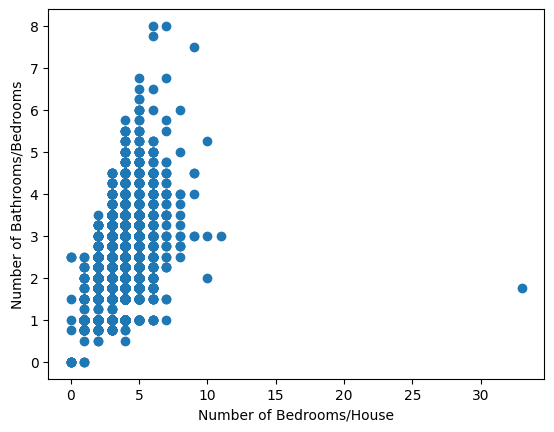

In [14]:
plt.scatter(houseprice_df["bedrooms"], houseprice_df["bathrooms"])
plt.xlabel("Number of Bedrooms/House")
plt.ylabel("Number of Bathrooms/Bedrooms")
plt.show()

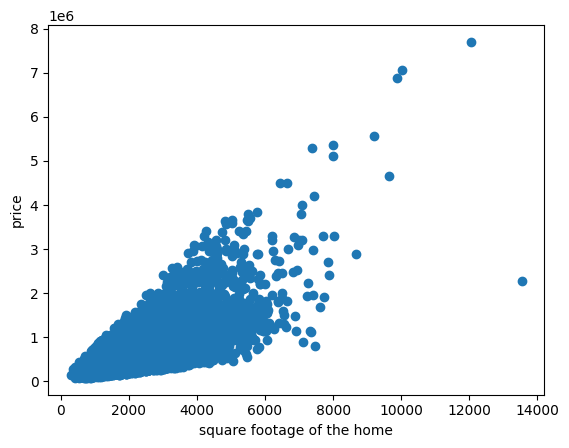

In [15]:
plt.scatter(houseprice_df["sqft_living"], houseprice_df["price"])
plt.xlabel("square footage of the home")
plt.ylabel("price")
plt.show()

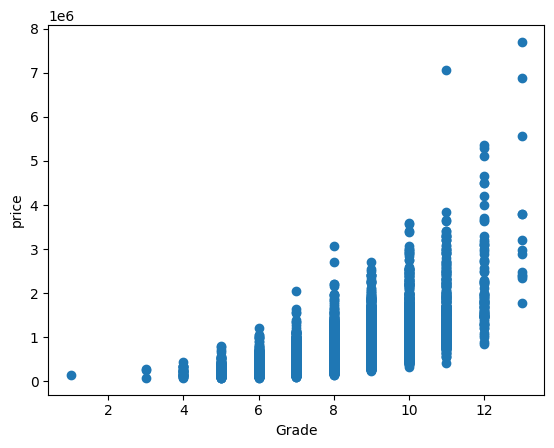

In [16]:
plt.scatter(houseprice_df["grade"], houseprice_df["price"])
plt.xlabel("Grade")
plt.ylabel("price")
plt.show()

In [17]:
houseprice_corr = houseprice_df.corr()
houseprice_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.036379,0.667434,0.605567,0.323842,0.054006,0.585377,0.082448
bedrooms,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,0.028433,0.356998,0.477616,0.303251,0.154248,0.391670,0.029252
bathrooms,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,-0.124917,0.664981,0.685363,0.283737,0.505968,0.568626,0.087163
sqft_living,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,-0.058689,0.762727,0.876644,0.434925,0.318066,0.756440,0.183301
sqft_lot,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,-0.008951,0.113617,0.183511,0.015301,0.053061,0.144605,0.718556
floors,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,-0.263808,0.458208,0.523899,-0.245634,0.489361,0.279907,-0.011275
condition,0.036379,0.028433,-0.124917,-0.058689,-0.008951,-0.263808,1.000000,-0.144647,-0.158206,0.174273,-0.361384,-0.092795,-0.003397
grade,0.667434,0.356998,0.664981,0.762727,0.113617,0.458208,-0.144647,1.000000,0.755924,0.168375,0.446958,0.713197,0.119243
sqft_above,0.605567,0.477616,0.685363,0.876644,0.183511,0.523899,-0.158206,0.755924,1.000000,-0.051976,0.423915,0.731871,0.194048
sqft_basement,0.323842,0.303251,0.283737,0.434925,0.015301,-0.245634,0.174273,0.168375,-0.051976,1.000000,-0.133195,0.200341,0.017292


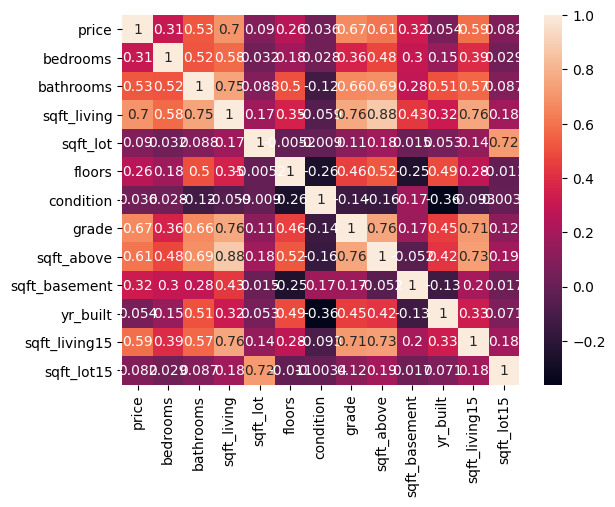

In [18]:
sns.heatmap(houseprice_corr, annot=True)
plt.show()

In [19]:
y = houseprice_df["price"]
X = houseprice_df.drop("price", axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [21]:
X_train.shape, y_train.shape

((12966, 15), (12966,))

In [22]:
X_test.shape, y_test.shape

((8645, 15), (8645,))

In [23]:
reg = LinearRegression().fit(X_test, y_test)
reg.score(X_test, y_test)

0.6581667642033314

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [27]:
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=5, scoring="r2")

In [28]:
scores

array([0.65605518, 0.65077556, 0.64342074, 0.65808578, 0.62575563])